### Abstract

The aim of this project is to determine if there are certain musical features that have changed over the past 10 year in the top 100 most popular song. To achieve this goal, this code scrapes data from the Billboard top 100 charts from the years 2014 to 2023 and creates a data frame. It then uses Spotify's API to request song-specific data features and graphs the average of each feature over time.

In [3]:
# @title Billboard Top 100 Data Collection
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests

def extract_songs_and_artists(url):
    top_100_by_year = {}
    for i in range(1, 11):
        year = int(url.split('/')[-3])                                                          # PROCESSING
        # Sending a GET request to the URL
        response = requests.get(url)

        # Checking if the request was successful
        if response.status_code == 200:
            url = response.text
        else:
            print(f"Failed to retrieve the webpage: Status code {response.status_code}")

        # Parse the HTML content
        soup = BeautifulSoup(url, 'html.parser')

        # Initialize lists to store songs, artists, and track ID's
        songs = []
        artists = []

        # Find all <h3> tags and process only the first 100
        for index, h3_tag in enumerate(soup.find_all('h3')):
            if index >= 100:  # Break the loop after processing 100 h3 tags
                break

            song_name = h3_tag.get_text(strip=True)
            if song_name:
                songs.append(song_name)

                # Assuming the artist name follows in a <span> tag
                next_span = h3_tag.find_next_sibling('span')
                if next_span:
                    artists.append(next_span.get_text(strip=True))
                else:
                    artists.append(None)  # In case no artist name is found

        # Create a DataFrame
        df = pd.DataFrame({
            'Song Name': songs,
            'Artist Name': artists
        })

        # Append df to top_100_by_year
        top_100_by_year[str(year)] = df

        # Define past year for href reference
        past_year = year - 1

        # Find the <a> tag with the specified text and href
        for a_tag in soup.find_all('a'):
            if str(past_year) in a_tag.get_text() and 'hot-100-songs' in a_tag['href']:
                # Set the <a> tag as the new url
                url = a_tag['href'] if a_tag else "Not found"


    return top_100_by_year

url = "https://www.billboard.com/charts/year-end/2023/hot-100-songs/"


songs_df = extract_songs_and_artists(url)

# Print song information dataframe for each year
for year, df in songs_df.items():
    print(f"Year: {year}")
    display(df)

Year: 2023


,Song Name,Artist Name
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Kill Bill,SZA
3,Anti-Hero,Taylor Swift
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"
...,...,...
95,"Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira
96,Meltdown,Travis Scott Featuring Drake
97,Put It On Da Floor Again,Latto Featuring Cardi B
98,Bloody Mary,Lady Gaga


Year: 2022


,Song Name,Artist Name
0,Heat Waves,Glass Animals
1,As It Was,Harry Styles
2,Stay,The Kid LAROI & Justin Bieber
3,Easy On Me,Adele
4,Shivers,Ed Sheeran
...,...,...
95,Flower Shops,ERNEST Featuring Morgan Wallen
96,To The Moon!,JNR CHOI & Sam Tompkins
97,Unholy,Sam Smith & Kim Petras
98,One Mississippi,Kane Brown


Year: 2021


,Song Name,Artist Name
0,Levitating,Dua Lipa
1,Save Your Tears,The Weeknd & Ariana Grande
2,Blinding Lights,The Weeknd
3,Mood,24kGoldn Featuring iann dior
4,Good 4 U,Olivia Rodrigo
...,...,...
95,Things A Man Oughta Know,Lainey Wilson
96,Throat Baby (Go Baby),BRS Kash
97,Tombstone,Rod Wave
98,Drinkin' Beer. Talkin' God. Amen.,Chase Rice Featuring Florida Georgia Line


Year: 2020


,Song Name,Artist Name
0,Blinding Lights,The Weeknd
1,Circles,Post Malone
2,The Box,Roddy Ricch
3,Don't Start Now,Dua Lipa
4,Rockstar,DaBaby Featuring Roddy Ricch
...,...,...
95,More Than My Hometown,Morgan Wallen
96,Lovin' On You,Luke Combs
97,Said Sum,Moneybagg Yo
98,Slide,H.E.R. Featuring YG


Year: 2019


,Song Name,Artist Name
0,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus
1,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee
2,Without Me,Halsey
3,Bad Guy,Billie Eilish
4,Wow.,Post Malone
...,...,...
95,Eyes On You,Chase Rice
96,All To Myself,Dan + Shay
97,Boyfriend,Ariana Grande & Social House
98,Walk Me Home,P!nk


Year: 2018


,Song Name,Artist Name
0,God's Plan,Drake
1,Perfect,Ed Sheeran
2,Meant To Be,Bebe Rexha & Florida Georgia Line
3,Havana,Camila Cabello Featuring Young Thug
4,Rockstar,Post Malone Featuring 21 Savage
...,...,...
95,One Number Away,Luke Combs
96,Powerglide,Rae Sremmurd & Juicy J
97,IDGAF,Dua Lipa
98,Mi Gente,J Balvin & Willy William Featuring Beyonce


Year: 2017


,Song Name,Artist Name
0,Shape Of You,Ed Sheeran
1,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber
2,That's What I Like,Bruno Mars
3,Humble.,Kendrick Lamar
4,Something Just Like This,The Chainsmokers & Coldplay
...,...,...
95,Havana,Camila Cabello Featuring Young Thug
96,What Lovers Do,Maroon 5 Featuring SZA
97,Do Re Mi,blackbear
98,Look At Me!,XXXTENTACION


Year: 2016


,Song Name,Artist Name
0,Love Yourself,Justin Bieber
1,Sorry,Justin Bieber
2,One Dance,Drake Featuring WizKid & Kyla
3,Work,Rihanna Featuring Drake
4,Stressed Out,twenty one pilots
...,...,...
95,Wicked,Future
96,Tiimmy Turner,Desiigner
97,See You Again,Wiz Khalifa Featuring Charlie Puth
98,Perfect,One Direction


Year: 2015


,Song Name,Artist Name
0,Uptown Funk!,Mark Ronson Featuring Bruno Mars
1,Thinking Out Loud,Ed Sheeran
2,See You Again,Wiz Khalifa Featuring Charlie Puth
3,Trap Queen,Fetty Wap
4,Sugar,Maroon 5
...,...,...
95,El Perdon (Forgiveness),Nicky Jam & Enrique Iglesias
96,She Knows,Ne-Yo Featuring Juicy J
97,Night Changes,One Direction
98,Back To Back,Drake


Year: 2014


,Song Name,Artist Name
0,Happy,Pharrell Williams
1,Dark Horse,Katy Perry Featuring Juicy J
2,All Of Me,John Legend
3,Fancy,Iggy Azalea Featuring Charli XCX
4,Counting Stars,OneRepublic
...,...,...
95,Studio,ScHoolboy Q Featuring BJ The Chicago Kid
96,0 To 100 / The Catch Up,Drake
97,I Don't Dance,Lee Brice
98,Somethin' Bad,Miranda Lambert Duet With Carrie Underwood


In [4]:
# @title Spotify Song ID Data Collection

# Iterate for each dataframe in songs_df
songs_df_cut = {year: songs_df[year] for year in ['2014']}

def get_spotify_track_id(song_name, artist_name):
    # Format the query for proper results
    query = f"{song_name} artist%3A%20{artist_name}"
    query = query.replace(" ", "%20")

    url = f"https://api.spotify.com/v1/search?q={query}&type=track"
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.get(url, headers=headers)
    results = response.json()

    # Extracting the Spotify ID of the first track in the search results
    if 'tracks' in results and 'items' in results['tracks'] and results['tracks']['items']:
        track_id = results['tracks']['items'][0]['id']
        return track_id
    else:
        return None

# This is my personal token
client_id = "7d3828cd7d8e4a09a7d185991ef6e9a1"
client_secret = "e1eab363173b46eb83b0d392ab4351c2"

auth_url = 'https://accounts.spotify.com/api/token'
data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

auth_response = requests.post(auth_url, data=data)
access_token = auth_response.json().get('access_token')

# Iterate for each dataframe in songs_df
for year, df in songs_df.items():
    # Iterate over each row (observation) in the DataFrame
    for index, row in df.iterrows():
        # Get the song name and artist name from the current row
        song_name = row['Song Name']
        artist_name = row['Artist Name']

        # Get the Spotify track ID using song name and artist name
        track_id = get_spotify_track_id(song_name, artist_name)

        # Add the track ID as a new feature (column) to the current row
        df.at[index, 'Song ID'] = track_id

# Now each DataFrame in top_100_by_year should have a new column 'Track ID' containing the Spotify track IDs
print(songs_df)

# Print song information dataframe for each year
for year, df in songs_df.items():
    print(f"Year: {year}")
    display(df)

{'2023':                        Song Name                           Artist Name  \
0                     Last Night                         Morgan Wallen   
1                        Flowers                           Miley Cyrus   
2                      Kill Bill                                   SZA   
3                      Anti-Hero                          Taylor Swift   
4                       Creepin'  Metro Boomin, The Weeknd & 21 Savage   
..                           ...                                   ...   
95  Bzrp Music Sessions, Vol. 53                    Bizarrap & Shakira   
96                      Meltdown          Travis Scott Featuring Drake   
97      Put It On Da Floor Again               Latto Featuring Cardi B   
98                   Bloody Mary                             Lady Gaga   
99          Watermelon Moonshine                         Lainey Wilson   

                   Song ID  
0   0k11c8vwyeNSGQex6UMa1v  
1   7oAZ8gLMBqSTDQUMvsqLT6  
2   1Qrg8KqiBpW

,Song Name,Artist Name,Song ID
0,Last Night,Morgan Wallen,0k11c8vwyeNSGQex6UMa1v
1,Flowers,Miley Cyrus,7oAZ8gLMBqSTDQUMvsqLT6
2,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL
3,Anti-Hero,Taylor Swift,0V3wPSX9ygBnCm8psDIegu
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage",2krJlC7MXXpOdPipgc0TaS
...,...,...,...
95,"Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira,6VciS3dRMpZhJiDxT8ArFi
96,Meltdown,Travis Scott Featuring Drake,67nepsnrcZkowTxMWigSbb
97,Put It On Da Floor Again,Latto Featuring Cardi B,6c6WmIHcHlhccEwSFBhzNa
98,Bloody Mary,Lady Gaga,11BKm0j4eYoCPPpCONAVwA


Year: 2022


,Song Name,Artist Name,Song ID
0,Heat Waves,Glass Animals,3USxtqRwSYz57Ewm6wWRMp
1,As It Was,Harry Styles,4Dvkj6JhhA12EX05fT7y2e
2,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20
3,Easy On Me,Adele,46IZ0fSY2mpAiktS3KOqds
4,Shivers,Ed Sheeran,59zbXPD0j7JxsVVm480g3b
...,...,...,...
95,Flower Shops,ERNEST Featuring Morgan Wallen,0De9jFjJ4eRLl7Yww2eBw1
96,To The Moon!,JNR CHOI & Sam Tompkins,2Ku7Iz5iUtukULZ229KUYx
97,Unholy,Sam Smith & Kim Petras,0NZPBYD5qbEWRs3PrGiRkT
98,One Mississippi,Kane Brown,5ekA7j4MPQa3NZbZQSpRfF


Year: 2021


,Song Name,Artist Name,Song ID
0,Levitating,Dua Lipa,5KknavP48RJhLVk4uBSviu
1,Save Your Tears,The Weeknd & Ariana Grande,5QO79kh1waicV47BqGRL3g
2,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W
3,Mood,24kGoldn Featuring iann dior,4jPy3l0RUwlUI9T5XHBW2m
4,Good 4 U,Olivia Rodrigo,4ZtFanR9U6ndgddUvNcjcG
...,...,...,...
95,Things A Man Oughta Know,Lainey Wilson,49GYvCcvMQq1SY3f7Y347h
96,Throat Baby (Go Baby),BRS Kash,15C4TnrrVdym7UykxQIOTZ
97,Tombstone,Rod Wave,3zc8VZEpM1onYV4FWGdFvm
98,Drinkin' Beer. Talkin' God. Amen.,Chase Rice Featuring Florida Georgia Line,0rOVgtieEk5SoypbulRiKI


Year: 2020


,Song Name,Artist Name,Song ID
0,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W
1,Circles,Post Malone,21jGcNKet2qwijlDFuPiPb
2,The Box,Roddy Ricch,0nbXyq5TXYPCO7pr3N8S4I
3,Don't Start Now,Dua Lipa,3PfIrDoz19wz7qK7tYeu62
4,Rockstar,DaBaby Featuring Roddy Ricch,7ytR5pFWmSjzHJIeQkgog4
...,...,...,...
95,More Than My Hometown,Morgan Wallen,5OELUCYgOHKFAvCERnAvfS
96,Lovin' On You,Luke Combs,0nYvjcSlCgjcwogQAwIwNp
97,Said Sum,Moneybagg Yo,3sKz6Sd72K0ofPWcJPPk6H
98,Slide,H.E.R. Featuring YG,2rTnVB1bvwxHtaIl4uVu7f


Year: 2019


,Song Name,Artist Name,Song ID
0,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,2YpeDb67231RjR0MgVLzsG
1,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,0RiRZpuVRbi7oqRdSMwhQY
2,Without Me,Halsey,6FZDfxM3a3UCqtzo5pxSLZ
3,Bad Guy,Billie Eilish,2Fxmhks0bxGSBdJ92vM42m
4,Wow.,Post Malone,7xQAfvXzm3AkraOtGPWIZg
...,...,...,...
95,Eyes On You,Chase Rice,4w95iGC6NrxZJ5o3D7bWyV
96,All To Myself,Dan + Shay,08tq1XcHwVt5PHXUo87i0D
97,Boyfriend,Ariana Grande & Social House,2Glf6h5zsGRg3xmhj2Jw1K
98,Walk Me Home,P!nk,6jfEZdUJ2Yla6h7gTJgKuo


Year: 2018


,Song Name,Artist Name,Song ID
0,God's Plan,Drake,5t9KtCfnu8wQui1G6IqqBR
1,Perfect,Ed Sheeran,5T6bJp3XgwT0IaCfKMxmAu
2,Meant To Be,Bebe Rexha & Florida Georgia Line,4e4fqjx0Izh4svvTef1z7e
3,Havana,Camila Cabello Featuring Young Thug,3whrwq4DtvucphBPUogRuJ
4,Rockstar,Post Malone Featuring 21 Savage,0DC6XJuyJIotOK74ahqHEo
...,...,...,...
95,One Number Away,Luke Combs,4gB7HrYHbJVJ5RFOjxmoq4
96,Powerglide,Rae Sremmurd & Juicy J,1BuZAIO8WZpavWVbbq3Lci
97,IDGAF,Dua Lipa,6Y7KcCuKVzzydZ1EGla3du
98,Mi Gente,J Balvin & Willy William Featuring Beyonce,7COfe3P7KgfwDwIRB8LIDw


Year: 2017


,Song Name,Artist Name,Song ID
0,Shape Of You,Ed Sheeran,1KqvRRQd3lfM0pAlkGPrgD
1,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,6habFhsOp2NvshLv26DqMb
2,That's What I Like,Bruno Mars,0KKkJNfGyhkQ5aFogxQAPU
3,Humble.,Kendrick Lamar,6heRfvHrUIIPx9TqRg8SCq
4,Something Just Like This,The Chainsmokers & Coldplay,6RUKPb4LETWmmr3iAEQktW
...,...,...,...
95,Havana,Camila Cabello Featuring Young Thug,3whrwq4DtvucphBPUogRuJ
96,What Lovers Do,Maroon 5 Featuring SZA,2j5hsQvApottzvTn4pFJWF
97,Do Re Mi,blackbear,6Se3x9ANMLv0dCDsjGmEjh
98,Look At Me!,XXXTENTACION,7floNISpH8VF4z4459Qo18


Year: 2016


,Song Name,Artist Name,Song ID
0,Love Yourself,Justin Bieber,50kpGaPAhYJ3sGmk6vplg0
1,Sorry,Justin Bieber,09CtPGIpYB4BrO8qb1RGsF
2,One Dance,Drake Featuring WizKid & Kyla,1zi7xx7UVEFkmKfv06H8x0
3,Work,Rihanna Featuring Drake,72TFWvU3wUYdUuxejTTIzt
4,Stressed Out,twenty one pilots,3CRDbSIZ4r5MsZ0YwxuEkn
...,...,...,...
95,Wicked,Future,0bkR7Dtapmz4cLUq0E1vw5
96,Tiimmy Turner,Desiigner,3NJG6vMH1ZsectZkocMEm0
97,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc
98,Perfect,One Direction,3NLnwwAQbbFKcEcV8hDItk


Year: 2015


,Song Name,Artist Name,Song ID
0,Uptown Funk!,Mark Ronson Featuring Bruno Mars,32OlwWuMpZ6b0aN2RZOeMS
1,Thinking Out Loud,Ed Sheeran,34gCuhDGsG4bRPIf9bb02f
2,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc
3,Trap Queen,Fetty Wap,2d8JP84HNLKhmd6IYOoupQ
4,Sugar,Maroon 5,2iuZJX9X9P0GKaE93xcPjk
...,...,...,...
95,El Perdon (Forgiveness),Nicky Jam & Enrique Iglesias,7qCAVkHWZkF44OzOUKf8Cr
96,She Knows,Ne-Yo Featuring Juicy J,1xzUQMiCoY5pdego0pHMeV
97,Night Changes,One Direction,5O2P9iiztwhomNh8xkR9lJ
98,Back To Back,Drake,5lFDtgWsjRJu8fPOAyJIAK


Year: 2014


,Song Name,Artist Name,Song ID
0,Happy,Pharrell Williams,60nZcImufyMA1MKQY3dcCH
1,Dark Horse,Katy Perry Featuring Juicy J,4jbmgIyjGoXjY01XxatOx6
2,All Of Me,John Legend,3U4isOIWM3VvDubwSI3y7a
3,Fancy,Iggy Azalea Featuring Charli XCX,3oiMJQAWVaxSubJ7b2VUtX
4,Counting Stars,OneRepublic,2tpWsVSb9UEmDRxAl1zhX1
...,...,...,...
95,Studio,ScHoolboy Q Featuring BJ The Chicago Kid,7u1P36qRqrSNrXAp98cyp1
96,0 To 100 / The Catch Up,Drake,4jtyUzZm9WLc2AdaJ1dso7
97,I Don't Dance,Lee Brice,5aj0xPGiEUN3aI2oOYu14S
98,Somethin' Bad,Miranda Lambert Duet With Carrie Underwood,6s9m5J92By7jii22Q2XtY2


In [27]:
# @title Spotify Audio Features Data Collection


# Fetch the audio features of the track using its Spotify ID
def get_spotify_audio_features(song_id_list):
    audio_features_list = []
    url = f"https://api.spotify.com/v1/audio-features?ids={song_id_list}"
    headers = {"Authorization": f"Bearer {access_token}"}
    audio_features_response = requests.get(url, headers=headers)
    # Check if the request was successful
    if audio_features_response.status_code == 200:
        audio_features = audio_features_response.json()
        for track in audio_features['audio_features']:
            audio_features_list.append([
                    track['acousticness'],
                    track['danceability'],
                    track['energy'],
                    track['instrumentalness'],
                    track['liveness'],
                    track['loudness'],
                    track['speechiness'],
                    track['tempo'],
                    track['valence']
                ])
    return audio_features_list



for year, df in songs_df.items():
    song_id_list = ''
    for i in range(0, len(df['Song ID'])):
        if i != (len(df['Song ID']) - 1):
            song_id_list = song_id_list + df['Song ID'][i] + ","
        else:
            song_id_list = song_id_list + df['Song ID'][i]
    audio_features_list = get_spotify_audio_features(song_id_list)
    # Iterate over each row (observation) in the DataFrame
    for index, row in df.iterrows():
        # Add the track ID as a new feature (column) to the current row
        audio_features_attrib = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                      'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

        # Add the track audio features as new columns to the current row
        for i, feature in enumerate(audio_features_attrib): # use enumerate to include indexes for audio_features_list
            df.at[index, feature] = audio_features_list[index][i]
# Set the option to display 6 rows
pd.set_option('display.max_rows', 6)

# Print song information dataframe for each year
for year, df in songs_df.items():
    print(f"Year: {year}")
    display(df)

Year: 2023


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Last Night,Morgan Wallen,59uQI0PADDKeE6UZDTJEe8,0.45900,0.517,0.675,0.000000,0.1510,-5.382,0.0357,203.853,0.518
1,Flowers,Miley Cyrus,7oAZ8gLMBqSTDQUMvsqLT6,0.00358,0.703,0.274,0.890000,0.1880,-12.740,0.0466,118.308,0.555
2,Kill Bill,SZA,1Qrg8KqiBpW07V7PNxwwwL,0.05210,0.644,0.735,0.144000,0.1610,-5.747,0.0391,88.980,0.418
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Put It On Da Floor Again,Latto Featuring Cardi B,6c6WmIHcHlhccEwSFBhzNa,0.02820,0.849,0.614,0.000000,0.0603,-7.323,0.3170,111.363,0.472
98,Bloody Mary,Lady Gaga,11BKm0j4eYoCPPpCONAVwA,0.01070,0.591,0.637,0.000002,0.1130,-6.365,0.0300,99.998,0.432
99,Watermelon Moonshine,Lainey Wilson,3sYBFUXTv0STUoUINx9Qe8,0.47000,0.739,0.413,0.000025,0.1310,-6.709,0.0282,139.921,0.649


Year: 2022


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Heat Waves,Glass Animals,3USxtqRwSYz57Ewm6wWRMp,0.44000,0.761,0.525,0.000007,0.0921,-6.900,0.0944,80.870,0.531
1,As It Was,Harry Styles,1pnGi1bRyhoBPbp5Dzq10b,0.99300,0.727,0.132,0.930000,0.1240,-25.905,0.0451,121.996,0.190
2,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,0.03830,0.591,0.764,0.000000,0.1030,-5.484,0.0483,169.928,0.478
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Unholy,Sam Smith & Kim Petras,0NZPBYD5qbEWRs3PrGiRkT,0.01100,0.712,0.463,0.000003,0.3010,-7.399,0.0797,131.199,0.206
98,One Mississippi,Kane Brown,5ekA7j4MPQa3NZbZQSpRfF,0.00204,0.463,0.840,0.000002,0.1970,-5.807,0.0385,99.991,0.575
99,Circles Around This Town,Maren Morris,09IStsImFySgyp0pIQdqAc,0.17100,0.753,0.657,0.000000,0.1120,-3.061,0.0449,107.010,0.437


Year: 2021


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Levitating,Dua Lipa,5KknavP48RJhLVk4uBSviu,0.99000,0.597,0.243,0.915000,0.1330,-18.266,0.0398,103.012,0.492
1,Save Your Tears,The Weeknd & Ariana Grande,5QO79kh1waicV47BqGRL3g,0.02120,0.680,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644
2,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W,0.00833,0.605,0.784,0.000007,0.1140,-6.194,0.0592,170.999,0.873
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Tombstone,Rod Wave,5gUiTylvifZnUrynE4FFPu,0.03450,0.649,0.508,0.000036,0.0736,-10.232,0.0959,157.975,0.405
98,Drinkin' Beer. Talkin' God. Amen.,Chase Rice Featuring Florida Georgia Line,0rOVgtieEk5SoypbulRiKI,0.18500,0.627,0.678,0.000000,0.3740,-4.691,0.0294,100.032,0.724
99,Todo de Ti,Rauw Alejandro,4fSIb4hdOQ151TILNsSEaF,0.31000,0.780,0.718,0.000163,0.0932,-3.605,0.0506,127.949,0.342


Year: 2020


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Blinding Lights,The Weeknd,02nMYbIiYIzaFA3D3Bkn6W,0.00833,0.605,0.784,0.000007,0.1140,-6.194,0.0592,170.999,0.873
1,Circles,Post Malone,21jGcNKet2qwijlDFuPiPb,0.19200,0.695,0.762,0.002440,0.0863,-3.497,0.0395,120.042,0.553
2,The Box,Roddy Ricch,0nbXyq5TXYPCO7pr3N8S4I,0.10400,0.896,0.586,0.000000,0.7900,-6.687,0.0559,116.971,0.642
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Said Sum,Moneybagg Yo,3sKz6Sd72K0ofPWcJPPk6H,0.01850,0.929,0.667,0.000000,0.1000,-6.789,0.3530,126.998,0.274
98,Slide,H.E.R. Featuring YG,2rTnVB1bvwxHtaIl4uVu7f,0.08070,0.832,0.469,0.000008,0.2070,-9.141,0.3390,97.023,0.197
99,Walk Em Down,NLE Choppa Featuring Roddy Ricch,1Z0cZI0UzNbP9L8MzzGxqf,0.26800,0.867,0.744,0.000000,0.0713,-5.171,0.2270,84.005,0.645


Year: 2019


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,2YpeDb67231RjR0MgVLzsG,0.0533,0.878,0.619,0.000000,0.1130,-5.560,0.1020,136.041,0.639
1,Sunflower (Spider-Man: Into The Spider-Verse),Post Malone & Swae Lee,0RiRZpuVRbi7oqRdSMwhQY,0.5330,0.755,0.522,0.000000,0.0685,-4.368,0.0575,89.960,0.925
2,Without Me,Halsey,6FZDfxM3a3UCqtzo5pxSLZ,0.2970,0.752,0.488,0.000009,0.0936,-7.050,0.0705,136.041,0.533
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Boyfriend,Ariana Grande & Social House,2Glf6h5zsGRg3xmhj2Jw1K,0.3620,0.767,0.404,0.939000,0.1180,-10.808,0.1060,95.389,0.491
98,Walk Me Home,P!nk,6jfEZdUJ2Yla6h7gTJgKuo,0.0519,0.652,0.453,0.000000,0.1790,-6.119,0.0445,88.038,0.432
99,Robbery,Juice WRLD,6iaSML1PIYq936g62BDtBq,0.3280,0.623,0.692,0.000000,0.1530,-5.122,0.0504,79.899,0.566


Year: 2018


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,God's Plan,Drake,5t9KtCfnu8wQui1G6IqqBR,0.0322,0.758,0.452,0.000083,0.5830,-9.210,0.1100,77.168,0.346
1,Perfect,Ed Sheeran,5T6bJp3XgwT0IaCfKMxmAu,0.4590,0.432,0.377,0.000000,0.1140,-5.790,0.0304,94.973,0.394
2,Meant To Be,Bebe Rexha & Florida Georgia Line,4e4fqjx0Izh4svvTef1z7e,0.0476,0.642,0.772,0.000000,0.0646,-6.610,0.0848,153.995,0.589
...,...,...,...,...,...,...,...,...,...,...,...,...
97,IDGAF,Dua Lipa,6Y7KcCuKVzzydZ1EGla3du,0.9940,0.643,0.174,0.951000,0.0844,-20.446,0.0528,97.001,0.328
98,Mi Gente,J Balvin & Willy William Featuring Beyonce,7COfe3P7KgfwDwIRB8LIDw,0.0168,0.548,0.704,0.000023,0.1430,-4.838,0.0777,104.666,0.288
99,Believer,Imagine Dragons,0pqnGHJpmpxLKifKRmU6WP,0.0622,0.776,0.780,0.000000,0.0810,-4.374,0.1280,124.949,0.666


Year: 2017


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Shape Of You,Ed Sheeran,1KqvRRQd3lfM0pAlkGPrgD,0.00574,0.682,0.812,0.000000,0.0553,-2.691,0.1180,104.891,0.347
1,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,6habFhsOp2NvshLv26DqMb,0.19800,0.655,0.797,0.000000,0.0670,-4.787,0.1530,177.928,0.839
2,That's What I Like,Bruno Mars,0KKkJNfGyhkQ5aFogxQAPU,0.01300,0.853,0.560,0.000000,0.0944,-4.961,0.0406,134.066,0.860
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Do Re Mi,blackbear,6Se3x9ANMLv0dCDsjGmEjh,0.00522,0.745,0.593,0.000005,0.1230,-6.350,0.0524,111.001,0.170
98,Look At Me!,XXXTENTACION,7floNISpH8VF4z4459Qo18,0.25900,0.763,0.726,0.000000,0.0976,-6.405,0.2820,139.059,0.349
99,The Fighter,Keith Urban Featuring Carrie Underwood,5OUSPcqhYTOzpbXzoEvKim,0.03040,0.681,0.845,0.000000,0.1970,-5.147,0.0525,132.023,0.761


Year: 2016


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Love Yourself,Justin Bieber,50kpGaPAhYJ3sGmk6vplg0,0.8350,0.609,0.378,0.000000,0.2800,-9.828,0.4380,100.418,0.515
1,Sorry,Justin Bieber,09CtPGIpYB4BrO8qb1RGsF,0.0797,0.654,0.760,0.000000,0.2990,-3.669,0.0450,99.945,0.410
2,One Dance,Drake Featuring WizKid & Kyla,539UkWVh6FopB0mTR314jd,0.4270,0.837,0.556,0.797000,0.1100,-10.069,0.1000,124.791,0.605
...,...,...,...,...,...,...,...,...,...,...,...,...
97,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc,0.3690,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,0.283
98,Perfect,One Direction,3NLnwwAQbbFKcEcV8hDItk,0.0598,0.647,0.823,0.000000,0.1190,-5.231,0.0762,99.933,0.396
99,Bill Maher Fires CAA After Oscar Party Snub (E...,None,15z8ByzunNgFwZmcN3fxSj,0.9420,0.488,0.446,0.892000,0.0948,-12.899,0.0282,104.147,0.627


Year: 2015


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Uptown Funk!,Mark Ronson Featuring Bruno Mars,32OlwWuMpZ6b0aN2RZOeMS,0.00801,0.856,0.609,0.000082,0.0344,-7.223,0.0824,114.988,0.928
1,Thinking Out Loud,Ed Sheeran,34gCuhDGsG4bRPIf9bb02f,0.47400,0.781,0.445,0.000000,0.1840,-6.061,0.0295,78.998,0.591
2,See You Again,Wiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc,0.36900,0.689,0.481,0.000001,0.0649,-7.503,0.0815,80.025,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Night Changes,One Direction,5O2P9iiztwhomNh8xkR9lJ,0.85900,0.672,0.520,0.000000,0.1150,-7.747,0.0353,120.001,0.370
98,Back To Back,Drake,5lFDtgWsjRJu8fPOAyJIAK,0.00855,0.893,0.480,0.000000,0.1160,-3.728,0.3560,86.976,0.382
99,How Deep Is Your Love,Calvin Harris & Disciples,22mek4IiqubGD9ctzxc69s,0.03920,0.738,0.868,0.001690,0.3880,-4.373,0.0731,122.003,0.336


Year: 2014


,Song Name,Artist Name,Song ID,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Happy,Pharrell Williams,60nZcImufyMA1MKQY3dcCH,0.21900,0.647,0.822,0.000000,0.0908,-4.662,0.1830,160.019,0.962
1,Dark Horse,Katy Perry Featuring Juicy J,4jbmgIyjGoXjY01XxatOx6,0.00314,0.647,0.585,0.000000,0.1650,-6.123,0.0512,131.934,0.353
2,All Of Me,John Legend,3U4isOIWM3VvDubwSI3y7a,0.92200,0.422,0.264,0.000000,0.1320,-7.064,0.0322,119.930,0.331
...,...,...,...,...,...,...,...,...,...,...,...,...
97,I Don't Dance,Lee Brice,5aj0xPGiEUN3aI2oOYu14S,0.39900,0.587,0.559,0.000007,0.0992,-7.742,0.0321,92.036,0.190
98,Somethin' Bad,Miranda Lambert Duet With Carrie Underwood,6s9m5J92By7jii22Q2XtY2,0.05270,0.680,0.888,0.000003,0.0575,-5.308,0.0550,90.076,0.484
99,Adore You,Miley Cyrus,5AnCLGg35ziFOloEnXK4uu,0.11100,0.583,0.655,0.000004,0.1130,-5.407,0.0315,119.759,0.201


In [28]:
# @title Data Summary and Observation
# Initialize an empty dictionary to store the analysis results
analysis_results = {}

# Set the option to display 20 rows
pd.set_option('display.max_rows', 20)

# Iterate over the dictionary and perform analysis for each DataFrame
for year, df in songs_df.items():
    analysis_results[year] = df.describe().drop('count')

# Print analysis dataframe for each year
for year, df in analysis_results.items():
    print(f"Year: {year}")
    display(df)

{'2023':       acousticness  danceability    energy  instrumentalness  liveness  \
mean      0.286700      0.642360  0.608981          0.021661  0.179678   
std       0.269255      0.147448  0.178160          0.129406  0.129697   
min       0.001360      0.247000  0.091100          0.000000  0.050400   
25%       0.059800      0.537000  0.498500          0.000000  0.096475   
50%       0.181500      0.656500  0.613500          0.000000  0.119500   
75%       0.495500      0.738250  0.735250          0.000013  0.248250   
max       0.993000      0.954000  0.965000          0.930000  0.670000   

       loudness  speechiness       tempo   valence  
mean  -6.993730     0.094128  126.223420  0.516079  
std    3.032329     0.108232   28.505065  0.226303  
min  -25.905000     0.026200   67.196000  0.038500  
25%   -8.146500     0.033175  104.743250  0.350000  
50%   -6.434500     0.045850  123.888000  0.514500  
75%   -5.293750     0.092725  144.001500  0.684000  
max   -2.565000     0.60400

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.286700,0.642360,0.608981,0.021661,0.179678,-6.993730,0.094128,126.223420,0.516079
std,0.269255,0.147448,0.178160,0.129406,0.129697,3.032329,0.108232,28.505065,0.226303
min,0.001360,0.247000,0.091100,0.000000,0.050400,-25.905000,0.026200,67.196000,0.038500
25%,0.059800,0.537000,0.498500,0.000000,0.096475,-8.146500,0.033175,104.743250,0.350000
50%,0.181500,0.656500,0.613500,0.000000,0.119500,-6.434500,0.045850,123.888000,0.514500
75%,0.495500,0.738250,0.735250,0.000013,0.248250,-5.293750,0.092725,144.001500,0.684000
max,0.993000,0.954000,0.965000,0.930000,0.670000,-2.565000,0.604000,203.853000,0.947000


Year: 2022


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.250776,0.66309,0.614031,5.581777e-02,0.179800,-7.27497,0.08534,122.050980,0.527050
std,0.279325,0.14157,0.189907,2.212061e-01,0.132330,4.75175,0.07796,30.690586,0.230929
min,0.000307,0.33600,0.026600,0.000000e+00,0.042000,-31.54300,0.02680,67.196000,0.106000
25%,0.036025,0.58200,0.512000,0.000000e+00,0.092475,-7.66300,0.03610,100.727500,0.379000
50%,0.132500,0.67200,0.641000,6.700000e-07,0.122500,-6.04200,0.05140,119.714500,0.490000
75%,0.359000,0.76625,0.764000,2.957500e-05,0.244000,-4.98675,0.09545,140.171500,0.699250
max,0.996000,0.95100,0.937000,9.650000e-01,0.618000,-2.49800,0.34000,205.863000,0.961000


Year: 2021


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.240301,0.673210,0.585600,0.021437,0.18312,-6.98686,0.121255,119.33707,0.486575
std,0.251589,0.145148,0.148945,0.129527,0.13521,2.37602,0.125380,29.55505,0.229980
min,0.000602,0.332000,0.225000,0.000000,0.04610,-18.26600,0.023500,67.19600,0.062800
25%,0.033850,0.588250,0.497000,0.000000,0.10000,-8.26325,0.039525,92.52025,0.326750
50%,0.171000,0.678500,0.597000,0.000000,0.12750,-6.66550,0.058500,120.50350,0.475000
75%,0.341250,0.762500,0.695250,0.000007,0.23500,-5.45850,0.138250,139.99850,0.683500
max,0.990000,0.957000,0.893000,0.917000,0.78200,-2.92200,0.619000,183.93700,0.919000


Year: 2020


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.235140,0.701780,0.599100,0.007934,0.187717,-6.595090,0.124620,118.487110,0.483632
std,0.229922,0.128956,0.150129,0.066838,0.134540,2.291267,0.110768,26.963247,0.205391
min,0.001650,0.336000,0.225000,0.000000,0.064500,-17.570000,0.025900,75.019000,0.060500
25%,0.055500,0.613250,0.490750,0.000000,0.102000,-7.590250,0.043150,96.870750,0.319500
50%,0.164000,0.703500,0.589500,0.000000,0.131500,-6.138000,0.074350,116.969000,0.486500
75%,0.312250,0.795000,0.717750,0.000002,0.238750,-5.178500,0.160250,136.016750,0.636500
max,0.902000,0.941000,0.949000,0.657000,0.790000,-2.607000,0.487000,180.056000,0.874000


Year: 2019


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.218000,0.718310,0.614870,0.015623,0.148807,-6.073960,0.127825,119.022710,0.478917
std,0.219051,0.133574,0.143178,0.100557,0.096896,2.336657,0.115064,27.224749,0.208947
min,0.000677,0.340000,0.111000,0.000000,0.055900,-14.505000,0.026200,75.445000,0.079700
25%,0.051425,0.625250,0.531750,0.000000,0.091725,-7.067250,0.044975,96.804750,0.337250
50%,0.131500,0.727000,0.625000,0.000000,0.115500,-5.656500,0.071350,116.011500,0.463500
75%,0.343000,0.829000,0.706500,0.000000,0.166250,-4.668000,0.191750,139.996500,0.624250
max,0.978000,0.970000,0.904000,0.939000,0.582000,-1.746000,0.467000,202.015000,0.952000


Year: 2018


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.174159,0.716200,0.631070,0.019107,0.163009,-6.242160,0.120715,118.813260,0.447014
std,0.208381,0.133441,0.147504,0.130677,0.143858,2.449673,0.105180,30.239232,0.201408
min,0.000813,0.333000,0.174000,0.000000,0.021500,-20.446000,0.026600,64.934000,0.049900
25%,0.034675,0.635750,0.540500,0.000000,0.099750,-7.252750,0.049125,95.034000,0.332000
50%,0.089350,0.707500,0.633000,0.000000,0.117500,-5.760500,0.078350,119.136500,0.439500
75%,0.216250,0.816250,0.730250,0.000023,0.165500,-4.956250,0.158750,138.498250,0.567500
max,0.994000,0.963000,0.909000,0.951000,0.967000,-2.384000,0.530000,203.911000,0.926000


Year: 2017


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.154950,0.712260,0.629480,0.018905,0.154976,-6.346210,0.126797,118.632450,0.505517
std,0.169513,0.125236,0.145265,0.124003,0.117047,2.351922,0.114088,26.862705,0.210869
min,0.000282,0.358000,0.314000,0.000000,0.046400,-15.600000,0.027500,73.012000,0.050600
25%,0.026150,0.636000,0.534500,0.000000,0.096475,-7.310250,0.051500,99.621250,0.355750
50%,0.082550,0.727000,0.632500,0.000000,0.121000,-5.981000,0.070100,112.998000,0.493000
75%,0.237500,0.799000,0.746000,0.000009,0.169750,-4.825250,0.155250,139.937500,0.667750
max,0.695000,0.940000,0.886000,0.906000,0.912000,-2.512000,0.505000,185.986000,0.969000


Year: 2016


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.214823,0.653700,0.612810,0.039633,0.167586,-6.773070,0.109365,121.696310,0.464400
std,0.254342,0.127003,0.174174,0.169821,0.132389,2.933822,0.095191,28.068724,0.199387
min,0.001910,0.355000,0.128000,0.000000,0.037100,-18.036000,0.028200,56.829000,0.102000
25%,0.035450,0.583000,0.525000,0.000000,0.091600,-8.062500,0.044600,99.997750,0.302000
50%,0.104500,0.659000,0.641500,0.000000,0.122000,-5.909500,0.071000,117.525500,0.437500
75%,0.311500,0.725750,0.734500,0.000009,0.177500,-5.032750,0.126750,144.061000,0.604250
max,0.963000,0.934000,0.927000,0.892000,0.726000,-2.343000,0.449000,190.169000,0.962000


Year: 2015


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.196398,0.652890,0.647163,0.010817,0.178437,-6.238350,0.089862,123.522730,0.494476
std,0.249298,0.150605,0.186217,0.085966,0.141143,2.833845,0.088822,32.333105,0.233078
min,0.000185,0.213000,0.074300,0.000000,0.026000,-18.071000,0.027600,53.863000,0.034600
25%,0.015100,0.574500,0.527500,0.000000,0.089325,-7.228500,0.041775,99.738250,0.313250
50%,0.069950,0.665500,0.685000,0.000000,0.120000,-5.658500,0.055900,119.952500,0.475500
75%,0.335750,0.758750,0.786250,0.000013,0.216250,-4.398750,0.089975,140.110750,0.657000
max,0.922000,0.893000,0.962000,0.855000,0.694000,-2.315000,0.592000,205.846000,0.962000


Year: 2014


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
mean,0.135449,0.646890,0.694520,0.014998,0.182123,-5.461940,0.076340,120.486580,0.515576
std,0.184016,0.138423,0.154524,0.094232,0.148820,1.725074,0.064847,27.346048,0.247890
min,0.000185,0.279000,0.147000,0.000000,0.021000,-11.767000,0.027900,74.897000,0.037600
25%,0.019775,0.554000,0.593500,0.000000,0.090725,-6.545250,0.038175,99.723500,0.325750
50%,0.058200,0.667000,0.714500,0.000001,0.120000,-5.338000,0.050750,120.007500,0.519500
75%,0.163250,0.742000,0.795250,0.000028,0.214000,-4.056250,0.090100,133.954500,0.714750
max,0.922000,0.964000,0.963000,0.715000,0.698000,-2.280000,0.390000,205.972000,0.962000


In [29]:
# @title Feature Means Dataframe

# Initialize a list to hold the mean values DataFrame for each year
mean_values_list = []

# Iterate over each year and extract the mean values
for year, features in analysis_results.items():
    mean_values = {feature: values.loc['mean'] for feature, values in features.items()}
    mean_values['Year'] = year  # Adding the year as a column
    mean_values_list.append(mean_values)

# Create a DataFrame from the list of mean values
mean_values_df = pd.DataFrame(mean_values_list)
mean_values_df.set_index('Year', inplace=True)  # Set the year as the index

# Display the resulting DataFrame
mean_values_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
Year,,,,,,,,,
2023,0.286700,0.64236,0.608981,0.021661,0.179678,-6.99373,0.094128,126.22342,0.516079
2022,0.250776,0.66309,0.614031,0.055818,0.179800,-7.27497,0.085340,122.05098,0.527050
2021,0.240301,0.67321,0.585600,0.021437,0.183120,-6.98686,0.121255,119.33707,0.486575
2020,0.235140,0.70178,0.599100,0.007934,0.187717,-6.59509,0.124620,118.48711,0.483632
2019,0.218000,0.71831,0.614870,0.015623,0.148807,-6.07396,0.127825,119.02271,0.478917
2018,0.174159,0.71620,0.631070,0.019107,0.163009,-6.24216,0.120715,118.81326,0.447014
2017,0.154950,0.71226,0.629480,0.018905,0.154976,-6.34621,0.126797,118.63245,0.505517
2016,0.214823,0.65370,0.612810,0.039633,0.167586,-6.77307,0.109365,121.69631,0.464400
2015,0.196398,0.65289,0.647163,0.010817,0.178437,-6.23835,0.089862,123.52273,0.494476


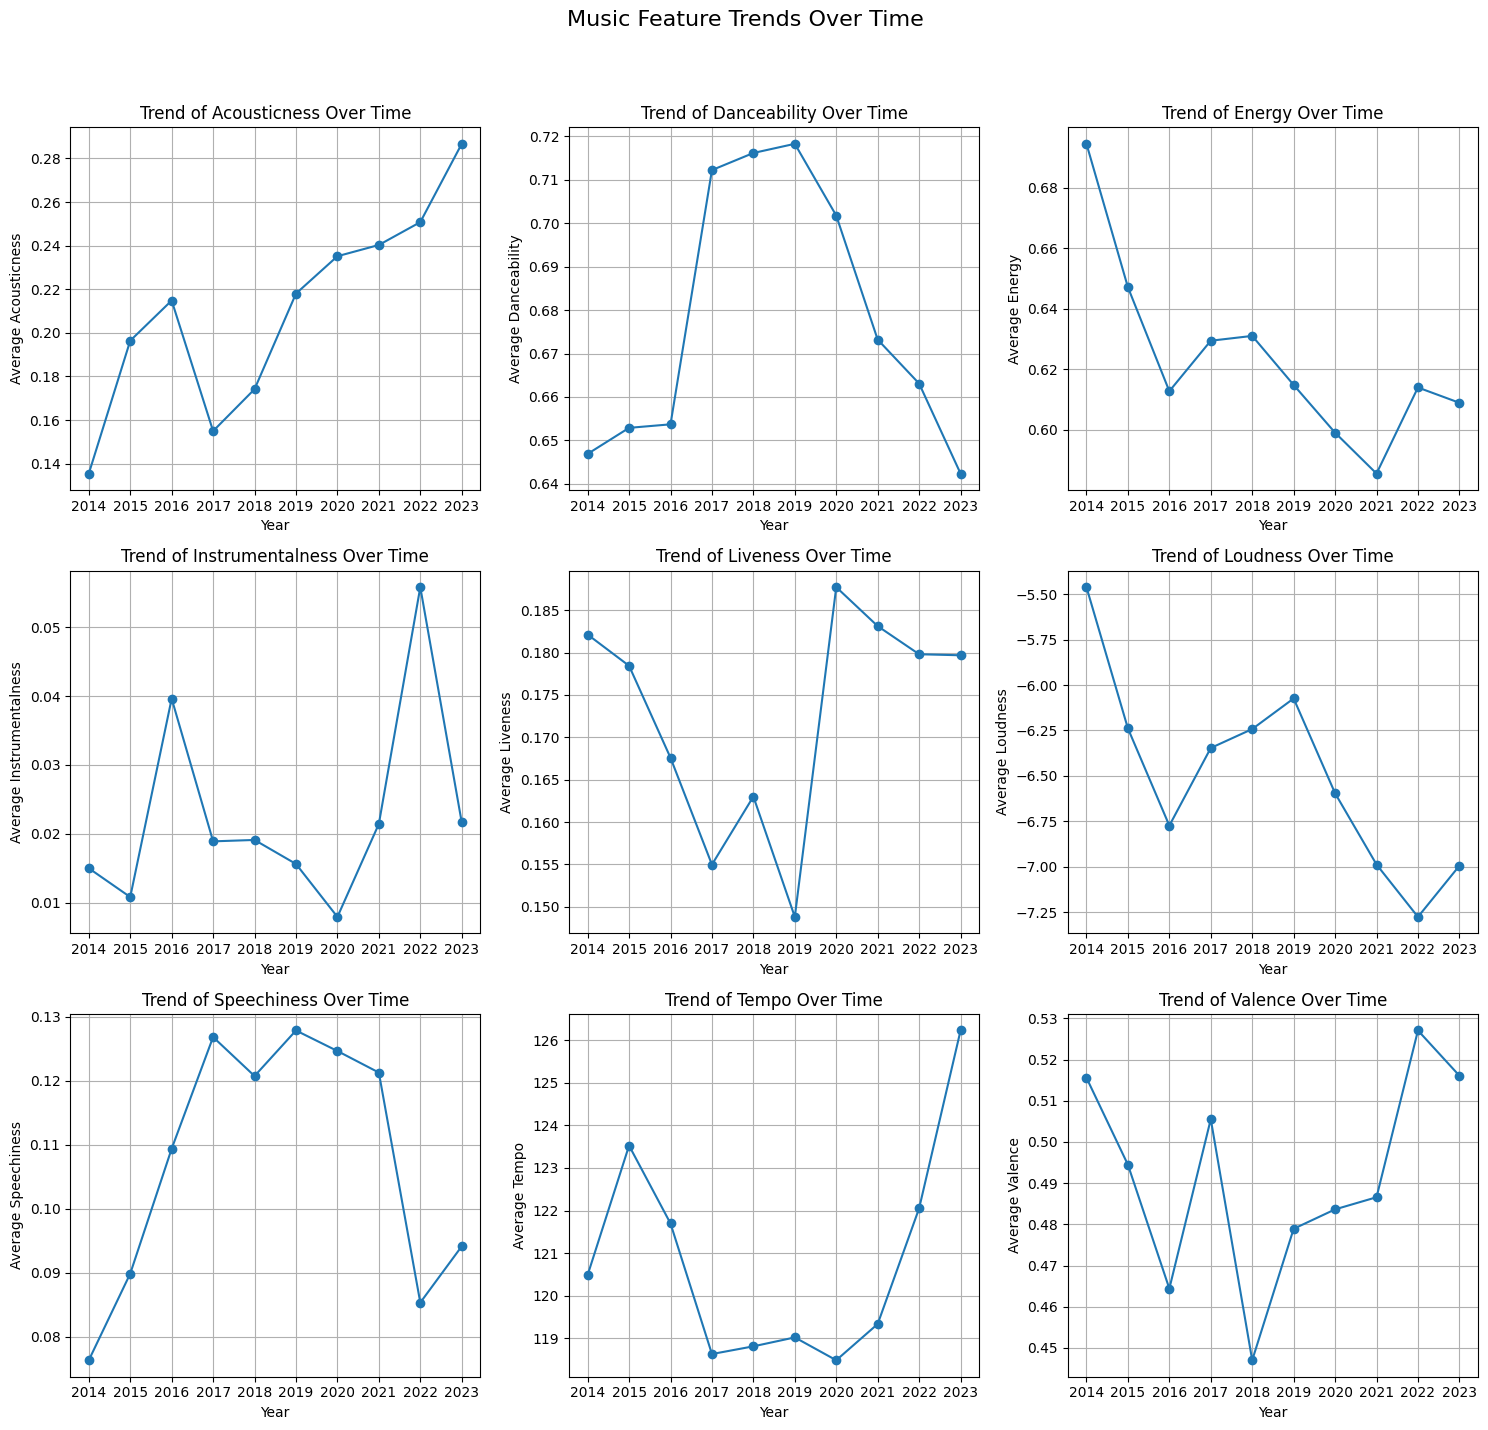

In [30]:
# Feature Means Plotting
import matplotlib.pyplot as plt

# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Music Feature Trends Over Time', fontsize=16)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Iterating over each feature to create a subplot
for i, feature in enumerate(mean_values_df.columns):
    axes[i].plot(mean_values_df.index[::-1], mean_values_df[feature][::-1], marker='o')  # Reversing the order for ascending years
    axes[i].set_title(f'Trend of {feature.capitalize()} Over Time')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(f'Average {feature.capitalize()}')
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()